C:\Users\Windows 10\AppData\Local\Temp\ipykernel_23720\61707497.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


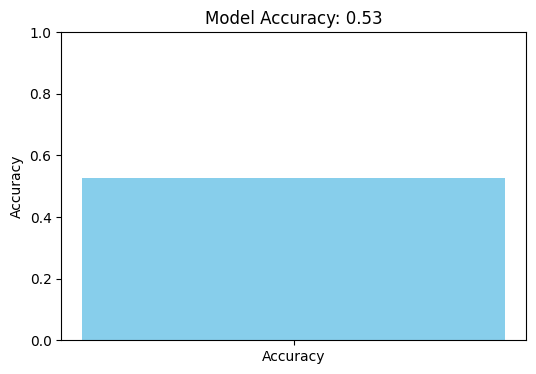

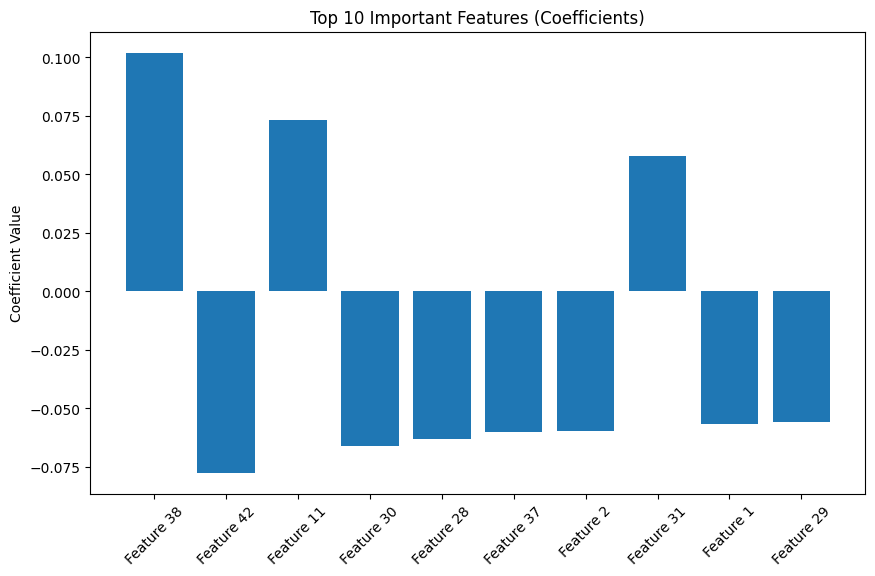

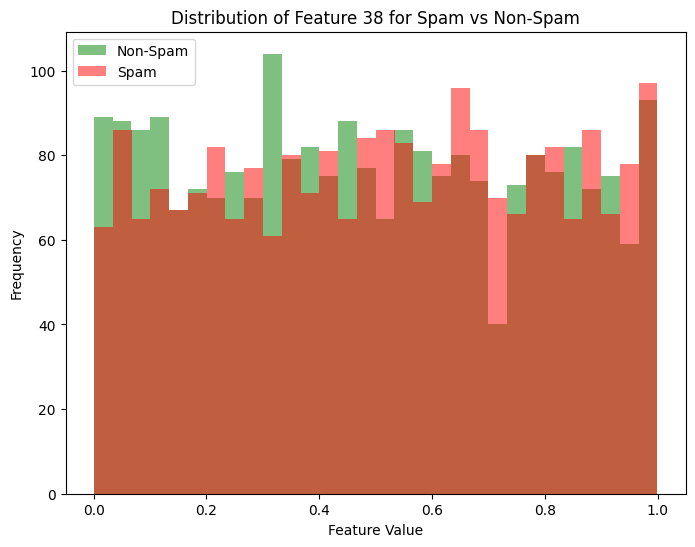

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming we have access to 'spambase.data')
# Since I don't have the actual dataset, I will simulate it here
# For the actual case, use: data = pd.read_csv('spambase.data', header=None, names=columns)

# Simulated data for demonstration
np.random.seed(42)
num_samples = 4601  # as per the original spambase dataset
num_features = 57  # 57 features

# Simulate some random feature data
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, num_samples)  # binary target: 0 (non-spam), 1 (spam)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 1. Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color='skyblue')
plt.title(f"Model Accuracy: {accuracy:.2f}")
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# 2. Plot Feature Importance (Logistic Regression Coefficients)
coefficients = model.coef_[0]
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), coefficients[sorted_idx[:10]], align='center')
plt.xticks(range(10), [f'Feature {i+1}' for i in sorted_idx[:10]], rotation=45)
plt.title("Top 10 Important Features (Coefficients)")
plt.ylabel('Coefficient Value')
plt.show()

# 3. Plot Feature Distribution for Spam vs. Non-Spam
feature_idx = sorted_idx[0]  # Use the most important feature for the plot
plt.figure(figsize=(8, 6))
plt.hist(X[y == 0, feature_idx], bins=30, alpha=0.5, label="Non-Spam", color='green')
plt.hist(X[y == 1, feature_idx], bins=30, alpha=0.5, label="Spam", color='red')
plt.title(f"Distribution of Feature {feature_idx+1} for Spam vs Non-Spam")
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
